In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pickle
from pickle import load
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc
import dash
from dash.dependencies import Input, Output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

C:\Users\khalid\AppData\Local\Temp\ipykernel_1848\1338791165.py:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\khalid\AppData\Local\Temp\ipykernel_1848\1338791165.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [ ]:
#Enter the username of the user you want to anaylze
Twitterusername01 = "elonmusk"

In [2]:
# Created a list to append all tweet attributes(data)
attributes_container = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(('from:'+Twitterusername01)).get_items()):
    if i>=5000:
        break
    attributes_container.append([tweet.user,tweet.date, tweet.likeCount, tweet.content])

# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["User","Date_Created", "Number_of_Likes", "Tweets"])

In [3]:
tweets_df.describe

<bound method NDFrame.describe of                             User              Date_Created  Number_of_Likes  \
0   https://twitter.com/S0laire0 2022-12-05 18:22:56+00:00                0   
1   https://twitter.com/S0laire0 2022-12-05 15:38:59+00:00                0   
2   https://twitter.com/S0laire0 2022-12-05 15:35:41+00:00                0   
3   https://twitter.com/S0laire0 2022-12-05 12:44:11+00:00                0   
4   https://twitter.com/S0laire0 2022-12-05 03:39:35+00:00                0   
..                           ...                       ...              ...   
71  https://twitter.com/S0laire0 2022-10-30 11:04:40+00:00                2   
72  https://twitter.com/S0laire0 2022-10-30 02:24:14+00:00                0   
73  https://twitter.com/S0laire0 2022-10-29 13:56:32+00:00                0   
74  https://twitter.com/S0laire0 2022-10-29 01:57:14+00:00                0   
75  https://twitter.com/S0laire0 2022-10-29 01:56:23+00:00                0   

                 

In [4]:
a=pd.to_datetime(tweets_df['Date_Created'])
a

0    2022-12-05 18:22:56+00:00
1    2022-12-05 15:38:59+00:00
2    2022-12-05 15:35:41+00:00
3    2022-12-05 12:44:11+00:00
4    2022-12-05 03:39:35+00:00
                ...           
71   2022-10-30 11:04:40+00:00
72   2022-10-30 02:24:14+00:00
73   2022-10-29 13:56:32+00:00
74   2022-10-29 01:57:14+00:00
75   2022-10-29 01:56:23+00:00
Name: Date_Created, Length: 76, dtype: datetime64[ns, UTC]

In [5]:
tweets_df

,User,Date_Created,Number_of_Likes,Tweets
0,https://twitter.com/S0laire0,2022-12-05 18:22:56+00:00,0,Let the game begin https://t.co/whtlA9hwPd
1,https://twitter.com/S0laire0,2022-12-05 15:38:59+00:00,0,Souls games players: https://t.co/2uR07dTGJH
2,https://twitter.com/S0laire0,2022-12-05 15:35:41+00:00,0,@TeosGame Doom 2
3,https://twitter.com/S0laire0,2022-12-05 12:44:11+00:00,0,@LeZeldaa God of war 1 https://t.co/DnhNmX9Vaw
4,https://twitter.com/S0laire0,2022-12-05 03:39:35+00:00,0,@HabisMazin The journey begins NOW? I THOUGHT ...
...,...,...,...,...
71,https://twitter.com/S0laire0,2022-10-30 11:04:40+00:00,2,خل نخلي هذا اول تويته https://t.co/jZgTnMSYwP
72,https://twitter.com/S0laire0,2022-10-30 02:24:14+00:00,0,@7lebMoz Anatomy
73,https://twitter.com/S0laire0,2022-10-29 13:56:32+00:00,0,@doppyisfree شكلك ما تلعبين فل تيم
74,https://twitter.com/S0laire0,2022-10-29 01:57:14+00:00,0,@doppyisfree هارد ستك بلات دي بي اس بالخدمه


<AxesSubplot: xlabel='Date_Created'>

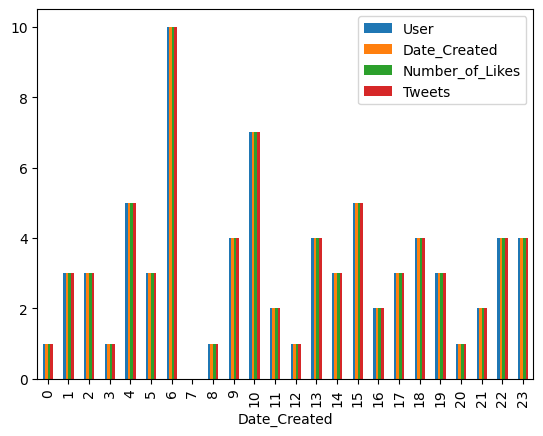

In [6]:
res = tweets_df.groupby(tweets_df["Date_Created"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")


# IMPORT MODEL AND SCALER

In [7]:
model = tf.keras.models.load_model('model.h5')
vectorizer = load(open('tokenizer.pkl', 'rb'))
 

In [8]:
TweetsToProcess=tweets_df['Tweets']

# Predict Tweets and add them to the dataframe

In [9]:
 #Apply scaler to data
x_test = pad_sequences(vectorizer.texts_to_sequences(TweetsToProcess), maxlen=300)

In [10]:
score = model.predict(x_test)

3/3 [==============================] - 1s 75ms/step


In [11]:
score

array([[0.05438134],
       [0.0073908 ],
       [0.03939098],
       [0.01399058],
       [0.9055042 ],
       [0.27975413],
       [0.27975413],
       [0.08367011],
       [0.15776318],
       [0.2606974 ],
       [0.15079021],
       [0.2606974 ],
       [0.05212334],
       [0.08681586],
       [0.00358612],
       [0.2606974 ],
       [0.03560457],
       [0.0839025 ],
       [0.0511466 ],
       [0.00448741],
       [0.2606974 ],
       [0.2606974 ],
       [0.04180717],
       [0.01032921],
       [0.27975413],
       [0.2606974 ],
       [0.11207006],
       [0.27975413],
       [0.4151717 ],
       [0.2606974 ],
       [0.08770336],
       [0.00470021],
       [0.27975413],
       [0.2606974 ],
       [0.2606974 ],
       [0.08367011],
       [0.02629257],
       [0.00761256],
       [0.09464628],
       [0.27975413],
       [0.39764303],
       [0.2606974 ],
       [0.27975413],
       [0.00264248],
       [0.03961816],
       [0.2606974 ],
       [0.1705959 ],
       [0.260

In [12]:
tweets_df["Predictions_Percentange"]=score

### If percentange is bigger than or equal to 0.5 then we can classify this tweet as a depressing one
### Rule of thumb the closer to 1 it gets the more depressing it is

In [13]:
tweets_df

,User,Date_Created,Number_of_Likes,Tweets,Predictions_Percentange
0,https://twitter.com/S0laire0,2022-12-05 18:22:56+00:00,0,Let the game begin https://t.co/whtlA9hwPd,0.054381
1,https://twitter.com/S0laire0,2022-12-05 15:38:59+00:00,0,Souls games players: https://t.co/2uR07dTGJH,0.007391
2,https://twitter.com/S0laire0,2022-12-05 15:35:41+00:00,0,@TeosGame Doom 2,0.039391
3,https://twitter.com/S0laire0,2022-12-05 12:44:11+00:00,0,@LeZeldaa God of war 1 https://t.co/DnhNmX9Vaw,0.013991
4,https://twitter.com/S0laire0,2022-12-05 03:39:35+00:00,0,@HabisMazin The journey begins NOW? I THOUGHT ...,0.905504
...,...,...,...,...,...
71,https://twitter.com/S0laire0,2022-10-30 11:04:40+00:00,2,خل نخلي هذا اول تويته https://t.co/jZgTnMSYwP,0.279754
72,https://twitter.com/S0laire0,2022-10-30 02:24:14+00:00,0,@7lebMoz Anatomy,0.038344
73,https://twitter.com/S0laire0,2022-10-29 13:56:32+00:00,0,@doppyisfree شكلك ما تلعبين فل تيم,0.260697
74,https://twitter.com/S0laire0,2022-10-29 01:57:14+00:00,0,@doppyisfree هارد ستك بلات دي بي اس بالخدمه,0.260697


In [14]:
tweets_df["Predictions"]=np.where(tweets_df['Predictions_Percentange']>=0.5, "Depression", "Non-Depression")


In [15]:
tweets_df

,User,Date_Created,Number_of_Likes,Tweets,Predictions_Percentange,Predictions
0,https://twitter.com/S0laire0,2022-12-05 18:22:56+00:00,0,Let the game begin https://t.co/whtlA9hwPd,0.054381,Non-Depression
1,https://twitter.com/S0laire0,2022-12-05 15:38:59+00:00,0,Souls games players: https://t.co/2uR07dTGJH,0.007391,Non-Depression
2,https://twitter.com/S0laire0,2022-12-05 15:35:41+00:00,0,@TeosGame Doom 2,0.039391,Non-Depression
3,https://twitter.com/S0laire0,2022-12-05 12:44:11+00:00,0,@LeZeldaa God of war 1 https://t.co/DnhNmX9Vaw,0.013991,Non-Depression
4,https://twitter.com/S0laire0,2022-12-05 03:39:35+00:00,0,@HabisMazin The journey begins NOW? I THOUGHT ...,0.905504,Depression
...,...,...,...,...,...,...
71,https://twitter.com/S0laire0,2022-10-30 11:04:40+00:00,2,خل نخلي هذا اول تويته https://t.co/jZgTnMSYwP,0.279754,Non-Depression
72,https://twitter.com/S0laire0,2022-10-30 02:24:14+00:00,0,@7lebMoz Anatomy,0.038344,Non-Depression
73,https://twitter.com/S0laire0,2022-10-29 13:56:32+00:00,0,@doppyisfree شكلك ما تلعبين فل تيم,0.260697,Non-Depression
74,https://twitter.com/S0laire0,2022-10-29 01:57:14+00:00,0,@doppyisfree هارد ستك بلات دي بي اس بالخدمه,0.260697,Non-Depression


## EDA & Insights

## Splitting date time to get more features and insights 

In [16]:
tweets_df['year'] = tweets_df['Date_Created'].dt.year


##Creating the month column form date time stamp.

tweets_df['month'] = tweets_df['Date_Created'].dt.month


##Creating the day column form date time stamp.

tweets_df['day'] = tweets_df['Date_Created'].dt.day


##Creating the hour column form date time stamp.

tweets_df['hour'] = tweets_df['Date_Created'].dt.hour


midnight_df = tweets_df.query("hour <= 5")


In [17]:
tweets_df

,User,Date_Created,Number_of_Likes,Tweets,Predictions_Percentange,Predictions,year,month,day,hour
0,https://twitter.com/S0laire0,2022-12-05 18:22:56+00:00,0,Let the game begin https://t.co/whtlA9hwPd,0.054381,Non-Depression,2022,12,5,18
1,https://twitter.com/S0laire0,2022-12-05 15:38:59+00:00,0,Souls games players: https://t.co/2uR07dTGJH,0.007391,Non-Depression,2022,12,5,15
2,https://twitter.com/S0laire0,2022-12-05 15:35:41+00:00,0,@TeosGame Doom 2,0.039391,Non-Depression,2022,12,5,15
3,https://twitter.com/S0laire0,2022-12-05 12:44:11+00:00,0,@LeZeldaa God of war 1 https://t.co/DnhNmX9Vaw,0.013991,Non-Depression,2022,12,5,12
4,https://twitter.com/S0laire0,2022-12-05 03:39:35+00:00,0,@HabisMazin The journey begins NOW? I THOUGHT ...,0.905504,Depression,2022,12,5,3
...,...,...,...,...,...,...,...,...,...,...
71,https://twitter.com/S0laire0,2022-10-30 11:04:40+00:00,2,خل نخلي هذا اول تويته https://t.co/jZgTnMSYwP,0.279754,Non-Depression,2022,10,30,11
72,https://twitter.com/S0laire0,2022-10-30 02:24:14+00:00,0,@7lebMoz Anatomy,0.038344,Non-Depression,2022,10,30,2
73,https://twitter.com/S0laire0,2022-10-29 13:56:32+00:00,0,@doppyisfree شكلك ما تلعبين فل تيم,0.260697,Non-Depression,2022,10,29,13
74,https://twitter.com/S0laire0,2022-10-29 01:57:14+00:00,0,@doppyisfree هارد ستك بلات دي بي اس بالخدمه,0.260697,Non-Depression,2022,10,29,1


## We're All Set Time To Explore Our Data!!

In [18]:
fig = px.bar(tweets_df, x="Predictions", color='month', title="Depression count")
fig.show();

In [19]:

#df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
df = tweets_df.query("Predictions == 'Depression'")
depression_count = tweets_df.value_counts("Predictions")
#fig = px.pie(df, values='depression_count', title='Population of European continent')
#fig.show()
depression_count

Predictions
Non-Depression    71
Depression         5
dtype: int64

In [20]:
df = midnight_df
fig = px.bar(df, x='Date_Created', y='Predictions', color='Predictions_Percentange',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

## We want to take a look for the daily tweets of the user to see when the user is tweeting regularly and when his mood going low

In [21]:
fig = px.pie(tweets_df, values='Predictions', names='Tweets', title='The tweets behavior')
fig.show()

In [22]:
fig = px.scatter(tweets_df , x="day", y="hour",
       size="Predictions_Percentange", color="Predictions",
                 hover_name="Tweets", log_x=True, size_max=60)
fig.show()

## it make sense to zoom in and focus on the midnight .. since almost all of the tweets after midnight have that dark energy.

## Let's not wast time and do our plots and answer our questions!

## First, We Took  a Copy of The Hour Column Which is The Column We're Intrested in .

## in the same time we don't want our original data to get any change.

In [23]:
#midnight_df = tweets_df[(tweets_df['hour'] <= 5 ) & (tweets_df['hour'] >= 0) ]


## We used the same plot to answer the question

In [24]:
fig = px.scatter(midnight_df , x="day", y="hour",
       size="Predictions_Percentange", color="Predictions",
                 hover_name="Tweets", log_x=True, size_max=60)
fig.show()

In [25]:
# depressed_df = tweets_df[ tweets_df['Predictions_Percentange'] >= 0.5 ]
# #Creating the text variable
# wordtext = " ".join(cat for cat in depressed_df.Tweets)
# # Create and generate a word cloud image:
# wordcloud = WordCloud().generate(wordtext)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# fig5 = plt
# fig5.show()

In [26]:



#################### Figure 1 ###########################
# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(tweets_df.Date_Created), y=list(tweets_df.Predictions)))


# Set title
fig.update_layout(
    title_text="Depression Tweets by Time"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7,
                     label="1w",
                     step="day",
                     stepmode="backward"),
                dict(count=14,
                     label="2w",
                     step="day",
                     stepmode="backward"),                
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=3,
                     label="3m",
                     step="month",
                     stepmode="backward"),                
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

#################### Figure 2 ###########################


fig2 = px.bar(tweets_df, x="Predictions", color='month', title="Depression count")


#################### Figure 3 ###########################

fig3 = go.Figure()

fig3 = px.scatter(tweets_df , x="day", y="hour",
       size="Predictions_Percentange", color="Predictions",
                 hover_name="Tweets", log_x=True, size_max=60)


#################### Figure 4 ###########################

fig4 = px.pie(tweets_df, values='Number_of_Likes', names='Predictions', title='The tweets behavior')

###################### End of Figures ##################

app = JupyterDash(__name__)
app.layout = html.Div([
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig),
    dcc.Graph(figure=fig3),
    dcc.Graph(figure=fig4)
])

if __name__ == '__main__':
    app.run_server(debug=True,port=8051)

Dash app running on http://127.0.0.1:8051/
